In [1]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
tf.keras.backend.set_learning_phase(1)
from PIL import Image
from keras import backend as K 
import matplotlib.pyplot as plt

from src import pre_process
from src import denseNet
from src import efficientNet


ModuleNotFoundError: No module named 'pycore.tikzeng'

All .tiff images are stained with `Martius Scarlet Blue (MSB) stain`. The two major acute ischemic stroke (AIS) etiology subtypes and their main cellular differences are:

1. **Cardio Embolism (CE):** RBCs=47.67%, WBCs=4.22%, F= 29.19%, P=18.21%

2. **Artery Atherosclerosis (AA):** RBCs=42.58%, WBCs=3.12%, F=31.31%, P=20.81%


<font size="1,5"> [Abbasi M, Fitzgerald S, Ayers-Ringler J, Espina V, Mueller C, Rucker S, Kadirvel R, Kallmes D, Brinjikji W. Proteomic Analysis of Cardioembolic and Large Artery Atherosclerotic Clots Using Reverse Phase Protein Array Technology Reveals Key Cellular Interactions Within Clot Microenvironments. Cureus. 2021 Feb 22;13(2):e13499. doi: 10.7759/cureus.13499. PMID: 33777584; PMCID: PMC7990677.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7990677/)</font>

Given this insight, we can maintain the distinct colors in the images since each cellular subtype is stained differently. Rather than preserving every pixel, we can reduce their size to enhance the efficiency of the neural network (NN) processing.

![CE](/images/CEexample1.png)

In [2]:
data_path = "../Final-IRONHACK-Project/data/original/"
folder_names= ["train_folder", "val_folder1"]
pre_process.createfolders(data_path,folder_names)

Folder train_folder already exists at: ../Final-IRONHACK-Project/data/original/train_folder
Folder val_folder1 already exists at: ../Final-IRONHACK-Project/data/original/val_folder1


In [3]:
# Just split it once. Therefore this part of the code is commented.
# from src import pre_process
# data_path = "../Final-IRONHACK-Project/data/original/"
# pre_process.split_data(data_path)

['0d533f_0.tif', '00c058_0.tif', '0e696a_1.tif', '0b25f8_0.tif', 'ec3098_0.tif', '0b7871_1.tif', '0b7871_0.tif', '0d93ce_0.tif']
['0ed87f_1.tif', '0a47c9_0.tif']


In [3]:
# So I can plot all images regardless of the amount of pixels:
Image.MAX_IMAGE_PIXELS = 3000000000 

In [4]:
K.set_learning_phase(1)
img_width, img_height = 224,224 
nb_train_samples = 2  
nb_validation_samples = 4  
epochs = 2  #Number of times the algorithm is learning
batch_size = 3  #Number of training examples used in each iteration
n_classes = 2 

In [5]:
original_data_dir = "../Final-IRONHACK-Project/data/original"

train_generator, test_generator = pre_process.image_generator(original_data_dir,img_width, img_height, batch_size)

Found 9 images belonging to 2 classes.
Found 1 images belonging to 2 classes.


`DenseNet model:`

In [ ]:
# epochs = 2  
# trained_model = pre_process.get_weights(train_generator, test_generator, img_width, img_height, epochs)

In [6]:
n_classes = 2
dense_model = denseNet.DenseNet_model()
epochs = 2
architecture = dense_model.densenet_model(train_generator, test_generator, 150, 150, epochs)
architecture.summary()  



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)    

In [13]:
neuralnets.plot_neural_network(arch)

NameError: name 'neuralnets' is not defined

In [ ]:
comp = dense_model.compile_model()

In [ ]:
hist = dense_model.train(train_generator, test_generator, epochs=2)

Epoch 1/2


2/2 [==============================] - 63s 38s/step - loss: 0.5004 - accuracy: 1.0000 - lr: 0.0010
Epoch 2/2
1/2 [==============>...............] - ETA: 23s - loss: 9.2584e-09 - accuracy: 1.0000

In [ ]:
weigths = dense_model.get_weights()

In [ ]:
class_names = ["CE", "LAA"]
batch_size = 2
verbose = 2
eval = dense_model.evaluation(test_generator, class_names, batch_size)

ValueError: `y` argument is not supported when using `keras.utils.Sequence` as input.

1/1 [==============================] - 0s 109ms/step


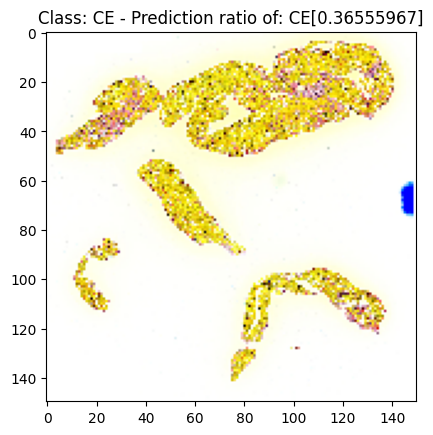

In [ ]:
DenseNet = dense_model.predict_densenet(test_generator,class_names)

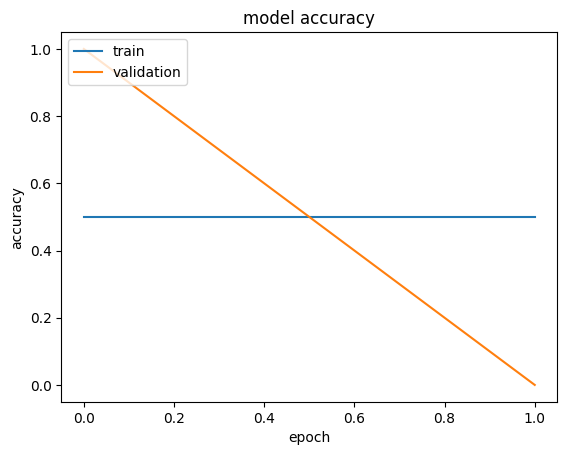

In [ ]:
def plot_hist(hist): 
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

`EfficientNet model:`

In [ ]:
epochs = 2  
trained_model = pre_process.get_weights_B0(train_generator, test_generator, img_width, img_height, epochs)

Epoch 1/2
2/2 [==============================] - 149s 123s/step - loss: 1.0677 - accuracy: 0.6000 - val_loss: 1.5338 - val_accuracy: 1.0000
Epoch 2/2
2/2 [==============================] - 96s 82s/step - loss: 5.5831 - accuracy: 0.6000 - val_loss: 1.5170 - val_accuracy: 1.0000


In [ ]:
efficient_model = efficientNet.EfficientNet()

architecture = efficient_model.efficient_model()
architecture.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, 150, 150, 3)          0         ['input_3[0][0]']             
                                                                                                  
 normalization_2 (Normaliza  (None, 150, 150, 3)          7         ['rescaling_3[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_4 (Rescaling)     (None, 150, 150, 3)          0         ['normalization_2[0

In [ ]:
hist = efficient_model.train(train_generator, test_generator, epochs=2)

Epoch 1/2
2/2 [==============================] - 122s 91s/step - loss: 1.2738 - accuracy: 0.6000 - val_loss: 1.7718 - val_accuracy: 1.0000
Epoch 2/2
2/2 [==============================] - 96s 79s/step - loss: 1.8467 - accuracy: 0.2000 - val_loss: 1.4161 - val_accuracy: 0.0000e+00


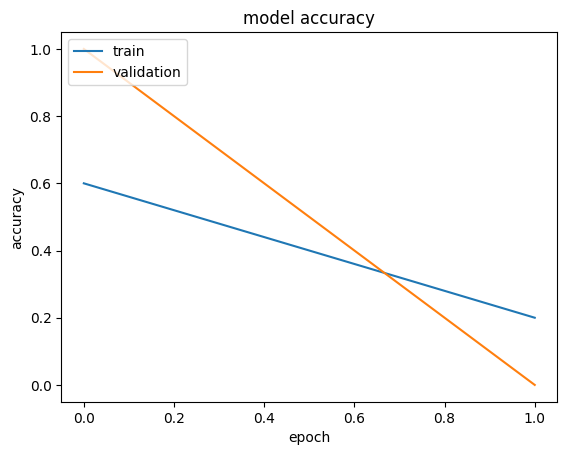

In [ ]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [ ]:
# efficient_model.unfreeze_model(hist)

#https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/